In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv("practice.csv")

In [3]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [5]:
# Declare the independent variables X
# Declare Dependent variables Y

# since AT ,V ,AP & RH are independent, we drop the PE using Drop function
x = dataset.drop(['PE'], axis = 1).values
# Y is the dependent value i.e PE
y = dataset['PE'].values

In [6]:
print("independent values: ",x)
print("Dependent values: ",y)

independent values:  [[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
Dependent values:  [463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [8]:
#Time to train the model on the training set
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [9]:
#predict the test results
y_pred = ml.predict(x_test)
#print the predicted results
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [10]:
#lets predict the value of Y from the first rows of the X values using the model we have created
ml.predict([[14.96, 41.76, 1024.07, 73.17]])

array([467.34820092])

In [11]:
#in the above the Predicted value of our Dependent variable "Y" is given from the model

In [12]:
#we then evaluate the accuracy of the model using r2_score
r2_score(y_test, y_pred)

0.9304112159477682

In [13]:
#the model is 93% accurate

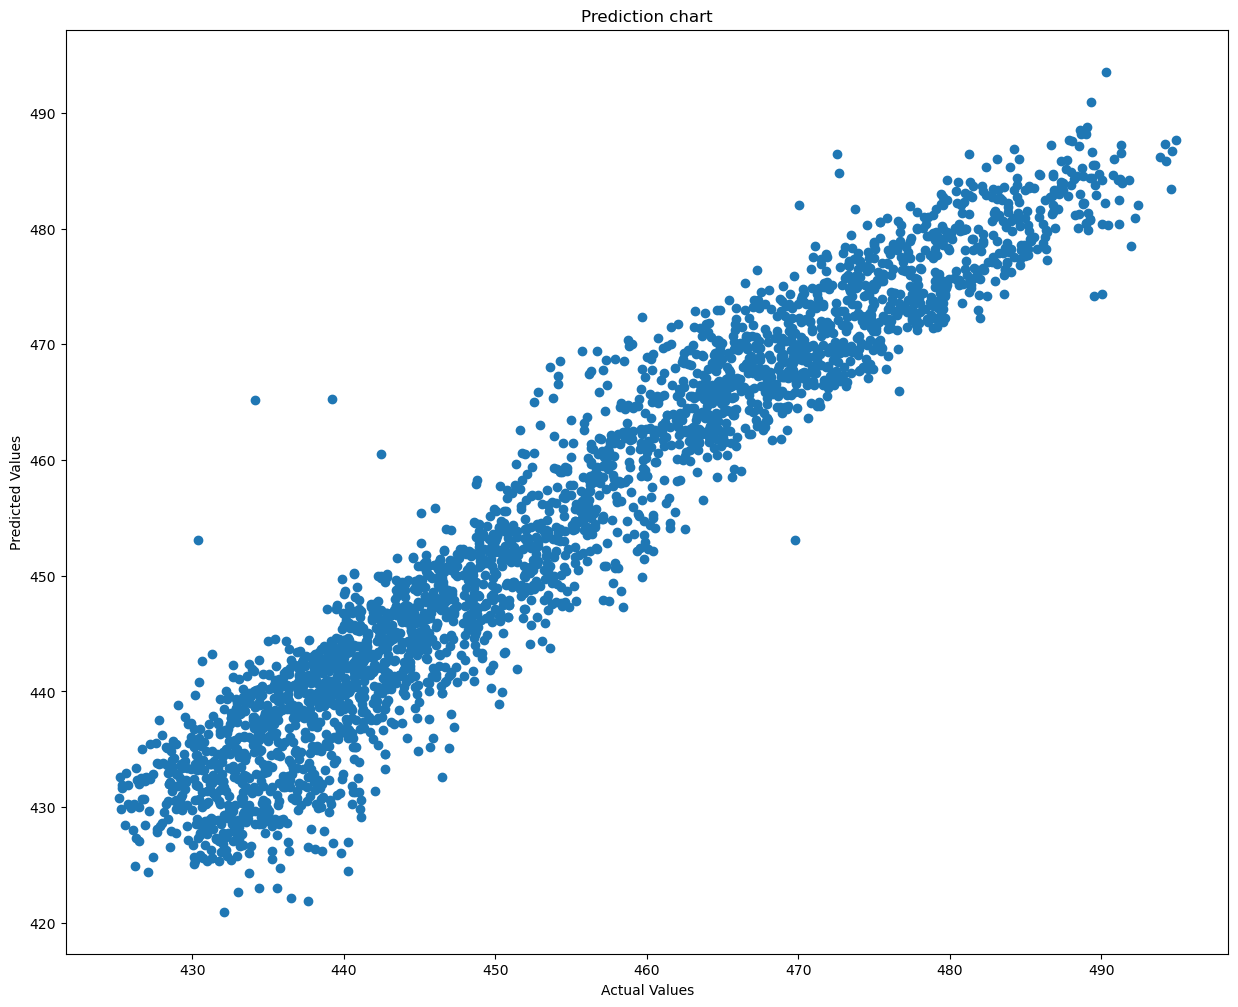

In [14]:
#we then visualise the results by using a scatter plot
fig = plt.figure(figsize = (15, 12))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction chart')
plt.show()

In [15]:
#print the predicted Values and compare to the actual values
predicted_y_data = pd.DataFrame({'Actual Y value': y_test, 'Predicted Y value': y_pred, 'Difference': y_test - y_pred})
predicted_y_data[0:20]

,Actual Y value,Predicted Y value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
